In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
train_df = pd.read_csv('../../datasets/training_2nd_dataset.csv')
train_df

,date_sequence,hour_sequence,domain_name,isp,node_name,avg_fbt_time,synack1_ratio,reset_ratio,tcp_conntime,icmp_lossrate,...,inner_network_rtt,cpu_util,mem_util,io_await_avg,io_await_max,io_util_avg,io_util_max,ng_traf_level,buffer_rate,city
0,1,4,domain_4,isp_11,node_512,9,0.977783,0.057003,73,0.041359,...,0,0.04032,0.62174,11,16,0.01678,0.0215,0.000,0.027413,city_2
1,1,4,domain_4,isp_11,node_267,6,0.981447,0.055372,73,0.039783,...,0,0.06964,0.48950,2,2,0.02708,0.0285,0.000,0.015271,city_2
2,1,4,domain_4,isp_11,node_241,7,0.958187,0.050343,94,0.019030,...,0,0.04388,0.60738,14,23,0.02980,0.0415,0.000,0.024042,city_1
3,1,4,domain_4,isp_11,node_366,9,0.970852,0.051625,76,0.024911,...,0,0.08012,0.52092,2,2,0.01058,0.0119,0.000,0.000000,city_1
4,1,4,domain_4,isp_11,node_267,6,0.978701,0.055613,80,0.041947,...,0,0.07562,0.48996,2,3,0.03044,0.0340,0.000,0.008762,city_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999995,18,22,domain_12,isp_12,node_1007,7,0.950262,0.078478,33,0.046853,...,0,0.15818,0.53158,17,22,0.14686,0.1656,0.350,0.030127,city_13
8999996,18,22,domain_12,isp_11,node_1099,7,0.975377,0.053427,27,0.012273,...,0,0.13834,0.58136,22,24,0.25840,0.2888,0.776,0.018868,city_30
8999997,18,22,domain_16,isp_11,node_141,13,0.957418,0.056195,33,0.023509,...,0,0.59614,0.53842,16,24,0.39716,0.4613,0.554,0.032068,city_29
8999998,18,22,domain_16,isp_10,node_261,10,0.956605,0.053794,36,0.039102,...,0,0.45342,0.56200,19,25,0.48074,0.5402,0.584,0.025113,city_19


In [3]:
gd_m = train_df.groupby(['domain_name'])[['buffer_rate']].mean()
gd_s = train_df.groupby(['domain_name'])[['buffer_rate']].std()
gd = pd.merge(gd_m, gd_s,left_index=True,right_index=True)
gd

,buffer_rate_x,buffer_rate_y
domain_name,,
domain_10,0.034710,0.025511
domain_12,0.029781,0.022787
domain_16,0.024245,0.020335
domain_18,0.073514,0.052762
domain_20,0.059951,0.038475
domain_4,0.053853,0.040365
domain_6,0.033021,0.026400
domain_8,0.028660,0.021979


In [4]:
gd.sort_values(by=['buffer_rate_x'],ascending=False, inplace=True)
gd

,buffer_rate_x,buffer_rate_y
domain_name,,
domain_18,0.073514,0.052762
domain_20,0.059951,0.038475
domain_4,0.053853,0.040365
domain_10,0.034710,0.025511
domain_6,0.033021,0.026400
domain_12,0.029781,0.022787
domain_8,0.028660,0.021979
domain_16,0.024245,0.020335


In [5]:
gi_m = train_df.groupby(['isp'])[['buffer_rate']].mean()
gi_s = train_df.groupby(['isp'])[['buffer_rate']].std()
gi = pd.merge(gi_m, gi_s,left_index=True,right_index=True)
gi.sort_values(by=['buffer_rate_x'],ascending=False, inplace=True)
gi

,buffer_rate_x,buffer_rate_y
isp,,
isp_10,0.038525,0.028107
isp_11,0.036495,0.035254
isp_12,0.031615,0.024639


In [6]:
gp_m = train_df.groupby(['city'])[['buffer_rate']].mean()
gp_s = train_df.groupby(['city'])[['buffer_rate']].std()
gp = pd.merge(gp_m, gp_s,left_index=True,right_index=True)
gp.sort_values(by=['buffer_rate_x'],ascending=False, inplace=True)
gp

,buffer_rate_x,buffer_rate_y
city,,
city_27,0.065485,0.056147
city_26,0.063059,0.056181
city_2,0.047492,0.031936
city_29,0.047118,0.037991
city_13,0.045719,0.027441
city_9,0.043990,0.034104
city_7,0.043918,0.031507
city_15,0.040042,0.028796
city_25,0.038378,0.027329


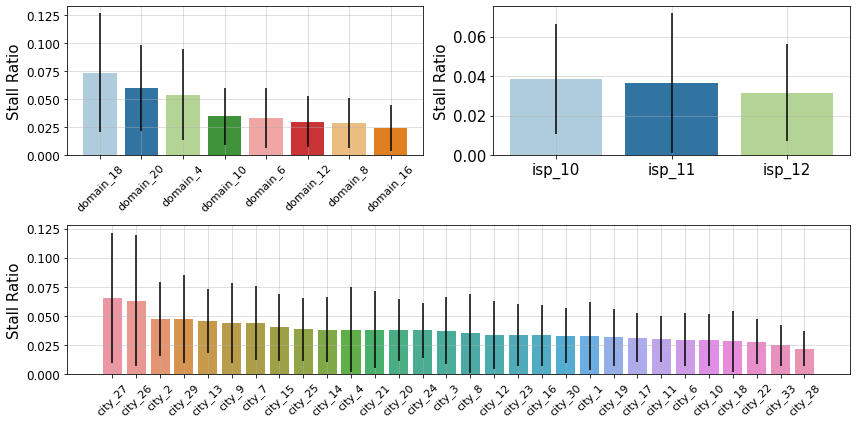

In [7]:
fig, axes = plt.subplot_mosaic("AB;CC", figsize = (12, 6))
# axes['A'].bar(np.arange(8), gd['buffer_rate_x'].values, xerr=gd['buffer_rate_y'].values, align='center')
sns.set_palette("Paired")
labels = gd.index.to_list()
A_as_ticklabel = [f"{a:.2f}" for a in gd['buffer_rate_x'].values]
ax1 = sns.barplot(x=labels, y=gd['buffer_rate_x'].values, ax=axes['A'])
ax1.errorbar(x = labels, y = gd['buffer_rate_x'].values,yerr=gd['buffer_rate_y'].values, fmt='none', c= 'black')
ax1.grid(alpha=0.5)
# ax1.set_yticklabels(fontsize=11)
ax1.tick_params(axis='both', which='major', labelsize=12)
# ax1.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
# ax1.yaxis.offsetText.set_fontsize(11)
ax1.set_xticklabels(labels = labels, rotation = 45, fontsize=11)
# ax1.set_yscale('log')
# ax1.set_xlabel('(a) The feature importance of LightGBM in the gerneral environment.' , fontsize=15)
ax1.set_ylabel('Stall Ratio', fontsize=15)
# ax1.bar_label(ax1.containers[0], label_type='bottem', labels=A_as_ticklabel)
# ax1.set_ylim(top=2.8*1e6)

labels2 = gi.index.to_list()
# A_as_ticklabel = [f"{a:.2f}" for a in gi['buffer_rate_x'].values]
ax2 = sns.barplot(x=labels2, y=gi['buffer_rate_x'].values, ax=axes['B'])
ax2.errorbar(x = labels2, y = gi['buffer_rate_x'].values,yerr=gi['buffer_rate_y'].values, fmt='none', c= 'black')
ax2.grid(alpha=0.5)
# ax1.set_yticklabels(fontsize=11)
ax2.tick_params(axis='both', which='major', labelsize=15)
# ax2.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
# ax2.yaxis.offsetText.set_fontsize(15)
ax2.set_xticklabels(labels = labels2, rotation = 0, fontsize=15)
# ax1.set_yscale('log')
# ax1.set_xlabel('(a) The feature importance of LightGBM in the gerneral environment.' , fontsize=15)
ax2.set_ylabel('Stall Ratio', fontsize=15)

labels3 = gp.index.to_list()
# A_as_ticklabel = [f"{a:.2f}" for a in gi['buffer_rate_x'].values]
ax3 = sns.barplot(x=labels3, y=gp['buffer_rate_x'].values, ax=axes['C'])
ax3.errorbar(x = labels3, y = gp['buffer_rate_x'].values, yerr=gp['buffer_rate_y'].values, fmt='none', c= 'black')
ax3.grid(alpha=0.5)
# ax1.set_yticklabels(fontsize=11)
ax3.tick_params(axis='both', which='major', labelsize=12)
# ax3.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
# ax3.yaxis.offsetText.set_fontsize(11)
ax3.set_xticklabels(labels = labels3, rotation = 45, fontsize=11)
# ax1.set_yscale('log')
# ax1.set_xlabel('(a) The feature importance of LightGBM in the gerneral environment.' , fontsize=15)
ax3.set_ylabel('Stall Ratio', fontsize=15)

fig.tight_layout()
# fig.savefig('./stall_ratio_spatial.pdf')